# Instructor Task
## Dataset
- [Here](https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv) is the dataset.
- [Here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) is a description of the data. Ignore column 0 as it is merely the ID of a patient record.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv, DataFrame
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix,  roc_curve, auc 
from sklearn import preprocessing

%matplotlib inline

In [137]:
ls

breast-cancer.csv               dsi-instructor-questions.ipynb*


## 1. Read in the data

In [138]:
breast_cancer = pd.read_csv("breast-cancer.csv",usecols=range(1,32),header=None)
# printing size of data frame
print ('Size of data frame: ',breast_cancer.shape)

Size of data frame:  (569, 31)


In [139]:
# defining a function to find missing values
def count_missing(frame):
    return (frame.shape[0] * frame.shape[1]) - frame.count().sum()
# checking for missing values in data frame
print ('Missing Values: ', count_missing(breast_cancer))

Missing Values:  0


In [140]:
# get head of dataset
breast_cancer.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [141]:
# get tail of tail of dataset
breast_cancer.tail()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [142]:
# drop the id column, since its not important for machine learning in this case.
breast = breast_cancer.drop(breast_cancer.columns.tolist()[0],axis=1)
breast_data = DataFrame(breast)
breast_data.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [143]:
# describe the numeric fields
breast_data.describe()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [144]:
# function to recode the categorical variables M as 1 and B as 0
def recode(data):
    if data[1] == "M":
        return 1
    elif data[1] == "B":
        return 0

In [145]:
#
X = breast_cancer.drop(breast_cancer.columns.tolist()[0],axis=1)
breast_data = DataFrame(X)
breast_data.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [146]:
# response
y = breast_cancer.apply(recode,axis=1)
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [147]:
# predictors
X = breast_data.drop(breast_cancer.columns.tolist()[1],axis=1)
X.head()

,3,4,5,6,7,8,9,10,11,12,...,22,23,24,25,26,27,28,29,30,31
0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [148]:
# Join predictors with response to make one dataframe
breast_DF = X.join(y.to_frame(name="label"))
breast_DF.head()

,3,4,5,6,7,8,9,10,11,12,...,23,24,25,26,27,28,29,30,31,label
0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## 2. Separate the data into feature and target.

In [149]:
# features
features = breast_DF[breast_DF.columns.tolist()[:-1]]
features.head()

,3,4,5,6,7,8,9,10,11,12,...,22,23,24,25,26,27,28,29,30,31
0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [150]:
# targets
targets = breast_DF[breast_DF.columns.tolist()[-1]]
targets.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [151]:
from sklearn import cross_validation as cval
from sklearn.grid_search import GridSearchCV

In [152]:
# Splitting data into training and test datasets with test_size of 0.33
X_train, X_test, y_train, y_test = cval.train_test_split(features, targets, test_size=0.33,random_state=42)

## 3. Create and evaluate using cross_val_score and 5 folds.
- What is the mean accuracy?
- What is the standard deviation of accuracy?

In [153]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

In [154]:
lr = LogisticRegression()

In [155]:
lr_scores = cross_val_score(lr, features, targets, cv=5)
print("Accuracy Scores:",lr_scores)

Accuracy Scores: [ 0.93043478  0.93043478  0.96460177  0.94690265  0.94690265]


In [156]:
# Take the mean accuracy across all cross validation segments.
print('Mean Accuracy: ', lr_scores.mean())

Mean Accuracy:  0.943855328973


In [157]:
# Take the standard deviation accuracy across all cross validation segments.
print('Standard Deviation Of Accuracy: ', lr_scores.std())

Standard Deviation Of Accuracy:  0.0127217084643


## 4. Get a classification report to identify type 1, type 2 errors.
- Use train_test_split to run your model once, with a test size of 0.33
- Make predictions on the test set
- Compare the predictions to the answers to determine the classification report

In [158]:
from sklearn.metrics import classification_report  

In [159]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
target_names = ['M', 'B']

In [161]:
prediction = lr_model.predict(X_test)
prediction

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0])

In [162]:
print(classification_report(y_test,prediction,target_names=target_names))

             precision    recall  f1-score   support

          M       0.97      0.97      0.97       121
          B       0.94      0.94      0.94        67

avg / total       0.96      0.96      0.96       188



## 5. Scale the data and see if that improves the score.

In [163]:
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [164]:
# scale only the features excluding the targets
features_scaled = preprocessing.scale(features)

In [165]:
lr = LogisticRegression()

In [166]:
scores = cross_val_score(lr, features_scaled, targets, cv=5)

In [167]:
print("Scores:",scores)

Scores: [ 0.9826087   0.97391304  0.97345133  0.97345133  0.99115044]


In [168]:
# Take the mean accuracy across all cross validation segments.
print('Mean Accuracy: ', scores.mean())

Mean Accuracy:  0.978914967295


In [169]:
# Take the standard deviation accuracy across all cross validation segments.
print('Standard Deviation Of Accuracy: ', scores.std())

Standard Deviation Of Accuracy:  0.00704375532036


<b>NB :</b> Mean accuracy increase and standard deviation accuracy also decreased further. So there is an improvement in the scores after scaling. 

## 6. Tune the model using automated parametric grid search via LogisticRegressionCV. Explain your intution behind what is being tuned.

In [170]:
from sklearn.linear_model import LogisticRegressionCV

In [171]:
# Splitting data into training and test datasets with test_size of 0.33
X_train2, X_test2, y_train2, y_test2 = cval.train_test_split(features_scaled, targets, test_size=0.33,random_state=42)

In [172]:
lr_model_cv = LogisticRegressionCV(Cs=30,cv=5,penalty='l2',solver='lbfgs', tol=0.0001, max_iter=100)
lr_model_cv.fit(X_train2, y_train2)

LogisticRegressionCV(Cs=30, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [173]:
target_names = ['M', 'B']

In [174]:
pred = lr_model_cv.predict(X_test2)
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0])

In [175]:
print(classification_report(y_test2,pred,target_names=target_names))

             precision    recall  f1-score   support

          M       0.99      0.99      0.99       121
          B       0.99      0.99      0.99        67

avg / total       0.99      0.99      0.99       188



<b>ANSWER:</b> We're going to tune <b>C</b>, the regularization parameter, which should prevent overfitting so our model generalizes well to the test data . C is used to set the amount of regularization. When using, for example, cross validation, to set the amount of regularization with C, there will be a different amount of samples between the main problem and the smaller problems within the folds of the cross validation.Since our loss function is dependent on the amount of samples, the latter will influence the selected value of C. 

### Q: What should we do to prevent overfitting so our model generalizes well to the test data?

<b>ANSWER:</b> The analyst should make sure that we set the amount of regularization parameters such that they are optimally adjusted by penalizing the parameters to prevent over-fitting of the model.It could be L1 or L2 regularization of the parameters in some cases. In this case , we are dealing with Logistic Regression so we have to tune the C parameter so that model generalizes well to the test data. The question that arises is How do we optimally adjust C to account for the different amount of training samples? The LogisticRegressionCV is able to determine this C.

### Q: What was the best C?

In [176]:
print("The Best C is :",lr_model_cv.C_*100)

The Best C is : [ 20.43359718]


## 7. Create Two Plots that describe the data and discuss your results

In [177]:
plotdata = pd.DataFrame(breast_cancer,columns=range(1,32))
plotdata.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


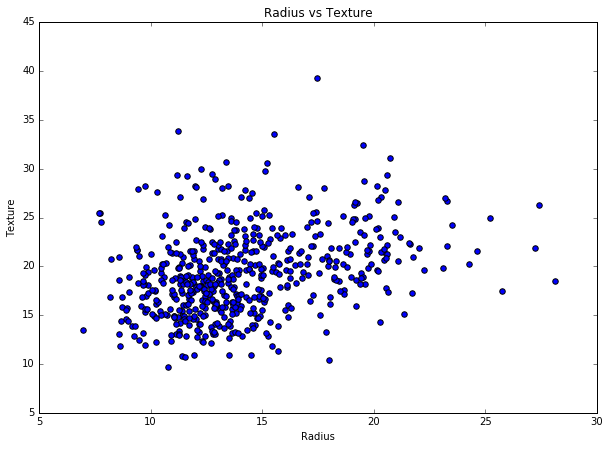

In [178]:
# scatter plot of column 2 and 3. Representing Radius and Texture
plt.figure(figsize=(10,7))
plt.scatter(plotdata[[2]],plotdata[[3]],s = 30)
plt.legend()
plt.xlabel("Radius")
plt.ylabel("Texture")
plt.title("Radius vs Texture")
plt.show()

<b>NB:</b> As we can see from the above scatter plot of radius vs. texture, there seems to be a positive linear relationship between the two variables. That is to say ; there exist some sort of upward trend. No obvious or extreme outliers detected.

(array([  1.,   5.,  13.,  24.,  22.,  33.,  65.,  56.,  64.,  55.,  39.,
         35.,  22.,  17.,  16.,  16.,  14.,  20.,  17.,  13.,   8.,   2.,
          1.,   4.,   1.,   2.,   1.,   0.,   1.,   2.]),
 array([  6.981 ,   7.6853,   8.3896,   9.0939,   9.7982,  10.5025,
         11.2068,  11.9111,  12.6154,  13.3197,  14.024 ,  14.7283,
         15.4326,  16.1369,  16.8412,  17.5455,  18.2498,  18.9541,
         19.6584,  20.3627,  21.067 ,  21.7713,  22.4756,  23.1799,
         23.8842,  24.5885,  25.2928,  25.9971,  26.7014,  27.4057,  28.11  ]),
 <a list of 30 Patch objects>)

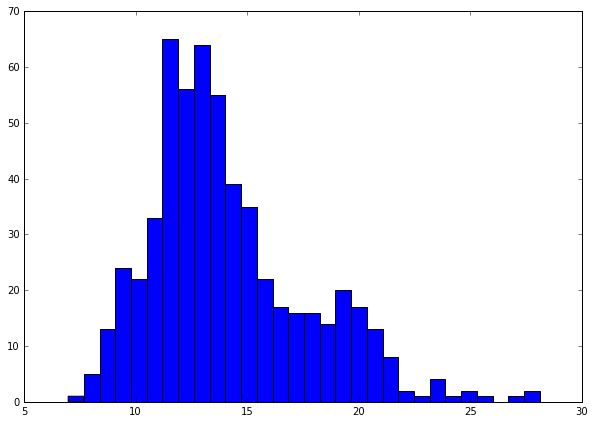

In [179]:
# histogram of the 2nd column
plt.figure(figsize=(10,7))
plt.hist(plotdata[[2]],bins=30,normed=False,histtype='bar')

<b>NB :</b> As we can see from the histogram above , it is not symmetric about the mean, not normally distributed but rather skewed to the left. In order to make it normally distributed one has to perform scaling on the variable using

$$ Z = \frac{(x-\mu)}{\delta} $$


## 8. Provide a one-sentence summary for a non-technical audience. Then provide a longer paragraph-length technical explanation.

<b>Non-Technical Audience :</b> 
If we try to describe the characteristics of tumor cells, the numbers related to malignant cells are distinct enough from the numbers related to benign tumors which allows us to build a predictive model to determines if a person has malignant or benign cancer based on historical data, without Doctors intervention.


<b>Technical Audience :</b>
Given the different characteristics of tumor cells leading to breast cancer, I determined whether a model can be developed to properly predict a malignant tumor or a benign tumor, based on the predictor variables.Logistic regression is one appropriate algorithm for obtaining such a classification model,even though there are other classification models like support vector machines, Decision Trees, etc. Logistic regression is easy to build and easy to interpret.  
<br/>
The independent variables in a logistic regression look like that for ordinary linear regression(right-hand side of equation).
<br/>
The left hand side makes use of  the logistic function because its a probability model; Given the dataset with a binary target variable and continuous predictors , an optimization algorithm finds the coefficients that maximize the likelihood of the observed data. When feed into the logistic model, will yield a number between [0,1] inclusive, and if it is above a given threshold, it will be presumed to be a case of malignant or benign. These thresholds value is dependent on the analyst relating to a particular domain. 
<br/>
In building a predictive model, cautions should be taken against overfitting the observed data . This could be prevented by introducing regularization parameters to penalize the observed parameters in the model. 
<br/>
The most common approach to guarantee some level of generalizability is to perform cross validation. There are many variations to cross validation. 

In this example, 5 fold cross validation was used, giving an average accuracy of 0.94 and a small standard deviation of 0.0127.  These numbers are good indication for obtaining accurate classifications model.  

After scaling the data, there was an improvement in the mean(~0.9789) and standard accuracy(~0.007).The parametric grid search of LogisticRegressionCV was able to obtain higher classification report with the scaled features as compared to the normal LogisticRegression model.